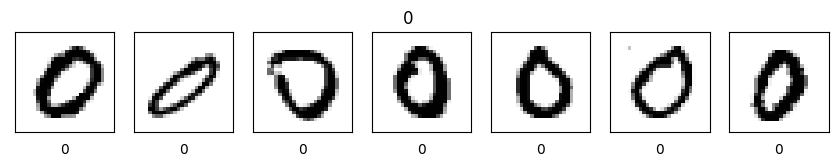

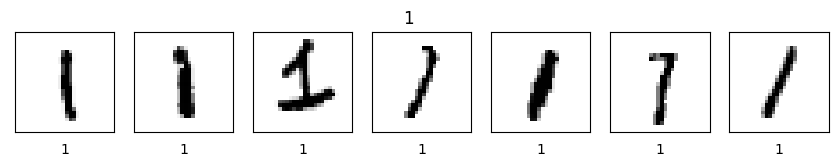

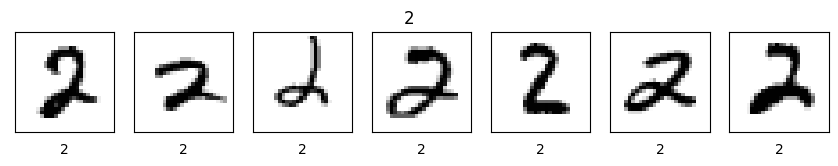

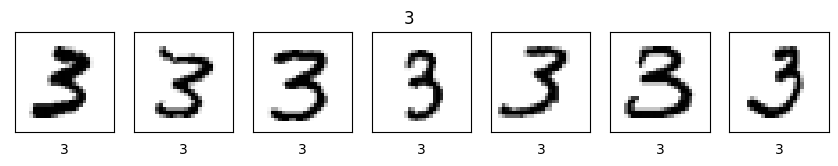

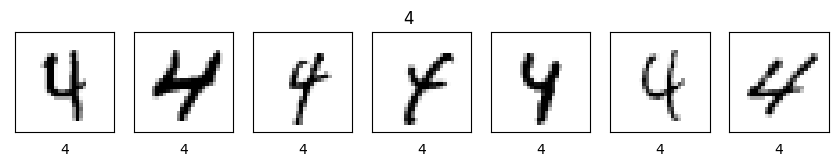

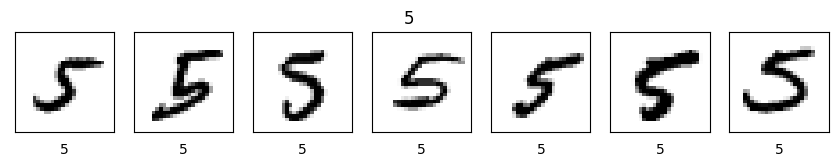

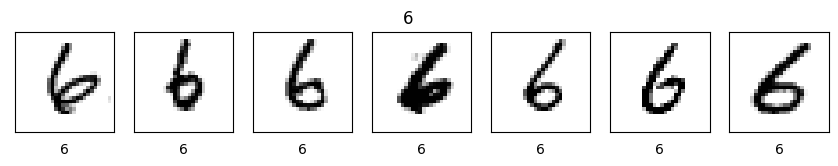

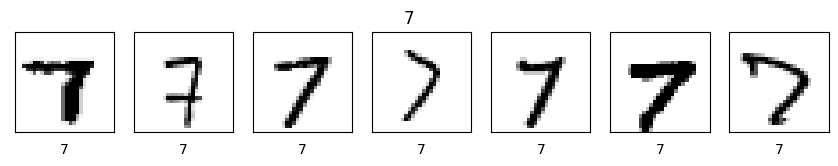

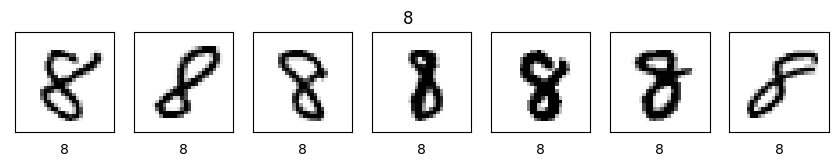

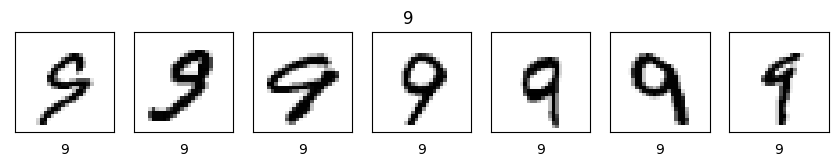

In [7]:
data_classes = {0:"0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 
                6: "6", 7: "7", 8: "8", 9: "9" }

import math
def y_class(c):
    return y_train[y_train == c].index.values.tolist()[10:17]

for i in [i for i in range(10) if i != 10]:
    plot_examples(X_train.to_numpy()[y_class(i)], y_train.to_numpy()[y_class(i)], 
                  row_length=7, title=data_classes[i])

In [8]:
def inner_product_distance(vec1, vec2):
    dist= 0
    dist = 1 -( np.dot(vec1,vec2)) / (np.linalg.norm(vec1)* (np.linalg.norm(vec2)))
    return dist

In [22]:
from sklearn.decomposition import PCA

n = 300

X_pca = PCA(n_components=70).fit_transform(X_train)
X_pca_df = pd.DataFrame(X_pca)

X_pca_N_df = PCA(n_components=70).fit_transform(X_noisy)
X_pca_N_df = pd.DataFrame(X_pca_N_df)

In [130]:
# euclidean
ecl = get_accuracies(X_train, y_train, X_train, y_train, euclidean_distance, list(range(1,21)), 1000)

X_eucl= calc_emp_risk(ecl)
X_eucl, y_eucl = zip(* sorted(X_eucl[0].items()))

#euclidean PCA
accuracies_train_ecl_pca= get_accuracies(X_pca_df, y_train, X_pca_df, y_train, euclidean_distance, list(range(1,21)), 1000)

X_eucl_PCA= calc_emp_risk(accuracies_train_ecl_pca)
X_eucl_PCA, Y_eucl_PCA = zip(* sorted(X_eucl_PCA[0].items())) 

#inner prod
inner_prod = get_accuracies(X_train, y_train, X_train, y_train, inner_product_distance, list(range(1,21)), 1000)

accuracies_inner_prod = calc_emp_risk(inner_prod)
x_inner_prod, y_inner_prod = zip(* sorted(accuracies_inner_prod[0].items())) 


#Inner Product PCA
inner_prod_pca = get_accuracies(X_pca_df, y_train, X_pca_df, y_train, inner_product_distance, list(range(1,21)), 1000)

accuracies_inner_prod_pca= calc_emp_risk(inner_prod_pca)
x_accuracies_inner_prod_pca, y_accuracies_inner_prod_pca = zip(* sorted(accuracies_inner_prod_pca[0].items())) 






iter: 999 {1: {'correct': 920, 'false': 80}, 2: {'correct': 917, 'false': 83}, 3: {'correct': 917, 'false': 83}, 4: {'correct': 919, 'false': 81}, 5: {'correct': 920, 'false': 80}, 6: {'correct': 912, 'false': 88}, 7: {'correct': 912, 'false': 88}, 8: {'correct': 912, 'false': 88}, 9: {'correct': 911, 'false': 89}, 10: {'correct': 909, 'false': 91}, 11: {'correct': 908, 'false': 92}, 12: {'correct': 905, 'false': 95}, 13: {'correct': 904, 'false': 96}, 14: {'correct': 908, 'false': 92}, 15: {'correct': 907, 'false': 93}, 16: {'correct': 904, 'false': 96}, 17: {'correct': 900, 'false': 100}, 18: {'correct': 897, 'false': 103}, 19: {'correct': 897, 'false': 103}, 20: {'correct': 896, 'false': 104}}
iter: 1999 {1: {'correct': 1846, 'false': 154}, 2: {'correct': 1846, 'false': 154}, 3: {'correct': 1846, 'false': 154}, 4: {'correct': 1837, 'false': 163}, 5: {'correct': 1841, 'false': 159}, 6: {'correct': 1835, 'false': 165}, 7: {'correct': 1835, 'false': 165}, 8: {'correct': 1823, 'false': 

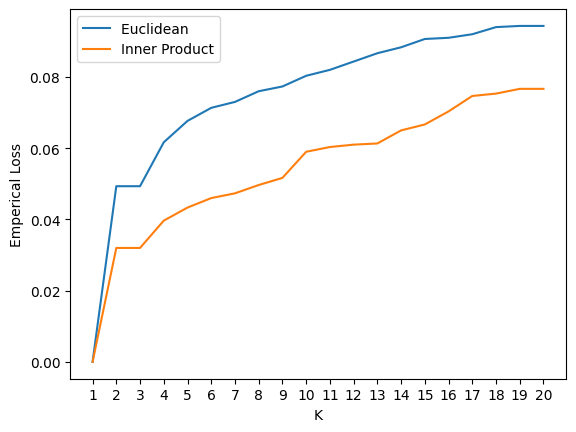

In [95]:
plt.plot(X_eucl, y_eucl, label = "Euclidean ")
# plt.plot(X_eucl_PCA, Y_eucl_PCA, label = "Euclidean PCA")
# plt.plot(X_eucl_N, y_eucl_N, label = "Euclidean Noisy")
# plt.vlines(X_eucl_N,ymin= 16,ymax=18, linestyles='--', colors='r')
plt.plot(x_inner_prod, y_inner_prod, label = "Inner Product")
# plt.plot(x_inner_prod y_eucl_N, label = "Inner Product Noisy")
# plt.plot(x_noisy_inner_prod_pca, y_noisy_inner_prod_pca, label = "Inner Product Noisy PCA")
plt.legend()
plt.ylabel("Emperical Loss")
plt.xlabel("K")
plt.xticks(x_eucl_N_PCA)
plt.savefig("K_comparison.jpeg")
plt.show()

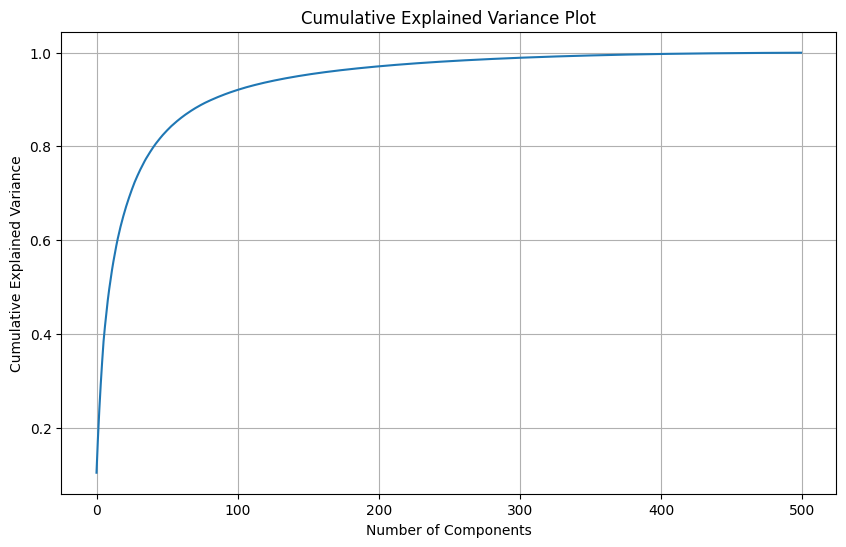

In [21]:
pca = PCA(n_components=500)
pca.fit(X_train)

# Create the cumulative explained variance plot
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [18]:
print(X.shape)
print(X_pca_df.shape)

(3000, 784)
(3000, 70)
